# Cosmology I - The Early Universe (Academic Year 2023/2024)

#### Lecture for the Master's degree on "Physics of the Universe: Cosmology, Astrophysics, Particles and Astroparticles" at the University of Zaragoza, Spain. <br>

**Lectures:** José Manuel Carmona (jcarmona@unizar.es) <br> 
**Tutorials:** Mathieu Kaltschmidt (mkaltschmidt@unizar.es)

## Tutorial 5: Axion Cosmology 

### Goal of these exercises

The main obejective of this set of exercises is to make you familiar with the numerical tools and simulations that are regularly used in the context of early Universe Axion Cosmology, as an outlook to a very active area of research, with  a lots of activities here at UniZar.

### Overview

The idea is to guide you through the implementation of your own axion string simulation code and run multiple simulations focusing on different parameter choices, that change the physics and therefore the expected outcomes. 

We plan to cover the following topics:

- Numerical techniques to solve differential equations
- Simulation of a complex scalar field in the early Universe
- Study of a toy model and QCD effects
- Overview on current research efforts in this area
- Whatever you are interested in! :-)

### Exercise 1: Creating your first simple Axion String Simulation

We start by loading the relevant python modules we need for the simulations.

In [1]:
# Load needed modules
import numpy as np
from numpy import *

#Plots and Animations
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
from matplotlib import cm
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml',embed_limit='1000')

#Performance
from numba import jit 

The first task is to set up the numerical environment for the initially (2+1)D-simulations. We specify the grid size, the spatial resolution and the time stepping for the propagation. Additionally we fix some of the physics.

#### Numerical Setup (Grid, Time stepping, Cosmology ...)

In [2]:
#Grid Setup
N = 128 #Number of grid points in one dimension (total grid = NxNxN points)
L = 128.0 #Volume of the simulation box
dx = N/L

#Time stepping
dt = 0.1 # timestep 
tmax = int(0.5*N*dx/dt) #light-crossing time (end of the simulation)

#Physics
alpha = 1 # PRS parameter (keep the strings "thick", in an expanding universe)
era = 2 #Fix cosmology: Radiation domination
w = 3 #String width in units of dx

#### Initial conditions

In [3]:
#Initial time
t = 1.0*dt

#Randomly distribute initial field values 
theta = 2*pi*random.uniform(size=(N,N))
phi1 = cos(theta) #Real part 
phi2 = sin(theta) #Imaginary part

#Create arrays for the field derivatives
phidot1 = zeros_like(phi1) 
phidot2 = zeros_like(phi2) 

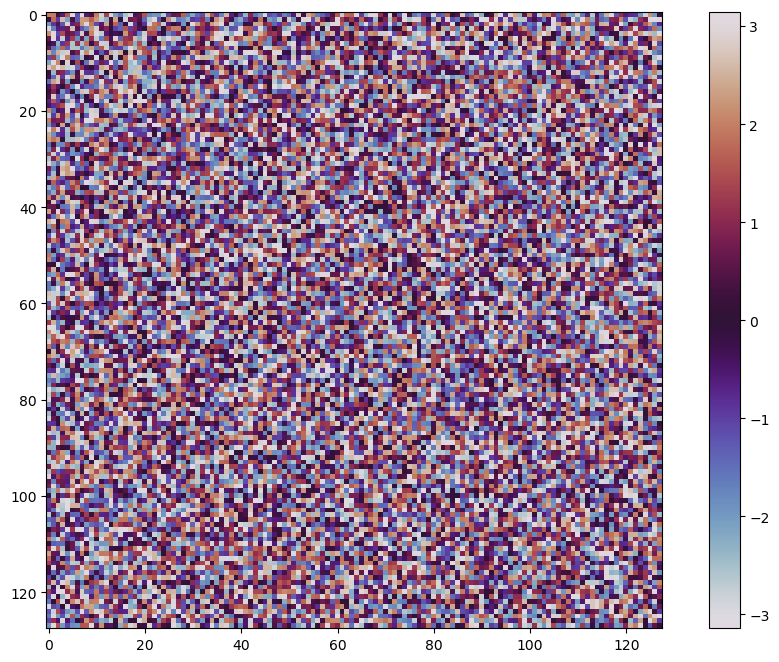

In [4]:
#Have a look at the initial distribution
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()

cmap = cm.twilight #Choose whichever periodic colormap you like
im = ax.imshow(arctan2(phi2,phi1),cmap=cmap)
plt.colorbar(im)
plt.show()

#### Numerical Evolution Algorithm(s)

To run our simulation we need to solve the equation of motion stepwise. Start by implementing the 2D version of the discrete Laplacian below: 


In [ ]:
# Function to do the discrete Laplacian in 2D
@jit(nopython=True)
def Laplacian_2D(phi,dx,N):
    #YOUR CODE HERE

Using the Laplacian you just implemented, complete the implementation of the integration kernel for our toy model, that will be updated at every iteration step. Keep in mind, that we have to compute the kernel for both, the real and the imaginary part of the field.

In [ ]:
#Evolution Kernel
def Kernel(phi1, phi2, phidot1, phidot2):
    K1 = #YOUR CODE HERE
    K2 = #YOUR CODE HERE
    return K1, K2

Compute the kernel for the initial conditions we generated above:

In [ ]:
K1, K2 = Kernel(phi1, phi2, phidot1, phidot2)

Our integrator of choice for this setup is a simple Leapfrog scheme, as discussed on the tutorial slides. Your task is to complete the implementation of the algorithm by completing the below function Evolve(). We already prepared some part of the code, that will allow us to create animations of our simulations to check if everything is working.

In [ ]:
def Evolve(timestep):
    #variables need to be declared as global to not be overwritten for every iteration step
    global t, phi1, phi2, phidot1, phidot2, K1,K2
    
    #Plot setup
    ax.clear()
    ax.set_title('Timestep = '+ str(int(t/dt)))
    
    #Update phi1 and phi2 and increase time
   
    #YOUR CODE HERE
    
    #Update the Kernels
    
    #YOUR CODE HERE
    
    #Update phidot1 and phidot2
    
    #YOUR CODE HERE
    
    #Store plot of the current timestep
    im = ax.imshow(arctan2(phi2,phi1), cmap=cmap, interpolation='nearest')
    return im

In [ ]:
#Set up the figure for displaying the simulation results
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.close() #Not display empty figure

In [ ]:
#Create an animation by running the simulation
simulation = animation.FuncAnimation(fig, Evolve, frames=tmax, blit=False, repeat=True)

In [ ]:
#Run the simulation
simulation 

What are you observing? Try to play with the different parameters and see what happens if you, for example, increase the timestep or the spatial resolution!

### Exercise 2: Thermal Effects and the Axion mass

So far we didn't care about a possible mass term for the scalar field. This will be the focus of this part of the exercise. Add the mass term (cf. slides) to the respective kernels and rerun the simulations. What do you observe? Change the mass parameter below and see what happens. <br>

Note, that for the case of the QCD axion, the mass strongly depends on the temperature ($m_a \sim T^{-n}$ with $n \simeq 8$). To keep things simple, we restrict ourself to a constant mass, but feel free to study more complex cases.

In [ ]:
m = 0.1 #mass

In [ ]:
#Evolution Kernel including mass terms 
def KernelQCD(phi1, phi2, phidot1, phidot2):
    K1, K2 = Kernel(phi1, phi2, phidot1, phidot2) 
    
    #Add the mass terms
    K1 += #YOUR CODE HERE
    K2 += #YOUR CODE HERE
    return K1, K2

Generalise the previous implementation to include mass effects. You can use your solution from the previous exercise and simply replace the computation of the kernels with the new KernelQCD() function, that features the mass term.

In [ ]:
def EvolveQCD(phi1, phi2, phidot1, phidot2, f1, f2):
    
    #YOUR CODE HERE
    
    return im

In [ ]:
#Set up the figure for displaying the simulation results
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.close() #Not display empty figure

In [ ]:
#Create an animation by running the simulation
simulation = animation.FuncAnimation(fig, Evolve, frames=tmax, blit=False, repeat=True)

In [ ]:
#Run the simulation
simulation 

From here on, you can decide how you want to proceed. We prepared some suggestions for specific extensions of this basic simulation code on the tutorial slides. You could for example try to generalise your setup to (3+1)D, which is in principle straightforward (except maybe the visualization ...). An interesting case from the physics perspective would be the study of a model with domain wall number $N_{\mathrm{DW}}=2$. <br>
There is a lot of interest in these kind of simulations and multiple groups are actively putting in a lot of effort to overcome the (computational) problems that one has to face in this context (cf. for example my talk from Tuesday). 

## Bonus: Going to (3+1)D

Of course, the real deal is to perform theses simulations in 3+1D. This is of computationally way more expensive and modern codes usually run on powerful HPC facilities. For those of you who still have some time and want to try out the 3D case, the exercise is to extend the simulation setup to include an additional spatial dimension. Start with the Laplacian:

In [ ]:
def Laplacian_3D(phi, dx, N):
    #YOUR CODE HERE

Don't forget to initialise the fields and derivaties in 3D!

In [ ]:
#Initial time
t = 1.0*dt

N=64 #only very small scale simulations will be possible on Colab

#Randomly distribute initial field values 
theta = 2*pi*random.uniform(size=(N,N,N))
phi1 = cos(theta) #Real part 
phi2 = sin(theta) #Imaginary part

#Create arrays for the field derivatives
phidot1 = zeros_like(phi1) 
phidot2 = zeros_like(phi2) 

Try to run and visualize your 3D simulations!

## Playground for your Ideas

## Outlook on JAXIONS 

If these introductory exercises sparked your interest in working on axion dark matter simulations, we want to highlight some of the recent works in this area and invite you to have a look at the Jaxions code, that is publicly available on GitHub (https://github.com/veintemillas/jaxions). Below you can find the references that use Jaxions to run their simulations.

### Further Reading and Applications

1. A. Vaquero, J. Redondo, J. Stadler (2018): Early seeds of axion miniclusters, [1809.09241](https://arxiv.org/abs/1809.09241)

2. B. Eggemeier, J. Redondo, K. Dolag, J. Niemeyer, A. Vaquero (2019): First Simulations of Axion Minicluster Halos, [1911.09417](https://arxiv.org/abs/1911.09417)

3. C. O’Hare, G.Pierobon, J. Redondo, Y. Wong (2021): Simulations of axionlike particles in the post-inflationary scenario, [2112.05117](https://arxiv.org/abs/2112.05117)

4. B. Eggemeier, C. O’Hare, G.Pierobon, J. Redondo, Y. Wong (2022): Axion minivoids and implications for direct detection, [2212.00560](https://arxiv.org/abs/2212.00560)

5. G. Pierobon, J. Redondo, K. Saikawa, A. Vaquero, G. D. Moore (2023): Miniclusters from axion string simulations, [2307.09941](https://arxiv.org/abs/2307.09941)

Find the Jaxions Code Repository on Github: https://github.com/veintemillas/jaxions. A complete manual and a website explaining the analysis tools are currently work in progress.

If you have any further questions, get in touch!
